<a href="https://colab.research.google.com/github/rocioivonneperezgonzalez-ship-it/Challenge_TlecomX_Alura_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Análisis de Evasión de Clientes**


Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.
Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.
¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

##📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.




***¿Qué debes hacer?***

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd
import requests
import json

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df = pd.json_normalize(data)  # df plano (normalizado)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


🔍 **Análisis de la Estructura de los Datos**
Los datos están organizados en un formato jerárquico (diccionario dentro de diccionario), conteniendo la siguiente información:

1. **Identificación del Cliente** - `'customerID'`: Identificador único del cliente.
* `'Churn'`: Indica si el cliente canceló el servicio (`Yes` o `No`).


2. **Información del Cliente** (`'customer'`)
* `'gender'`: Género del cliente (`Male` o `Female`).
* `'SeniorCitizen'`: Indica si el cliente es una persona mayor (0 = No, 1 = Sí).
* `'Partner'`: Si el cliente tiene pareja.
* `'Dependents'`: Si el cliente tiene dependientes.
* `'tenure'`: Tiempo de permanencia como cliente (en meses).


3. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: Indica si el cliente posee servicio de teléfono (`Yes` o `No`).
* `'MultipleLines'`: Si posee múltiples líneas telefónicas.


4. **Servicios de Internet** (`'internet'`)
* Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


5. **Información de la Cuenta** (`'account'`)
* `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: Si el cliente recibe facturas electrónicas.
* `'PaymentMethod'`: Método de pago (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges'`:
* `'Monthly'`: Valor mensual cobrado.
* `'Total'`: Valor total pagado por el cliente.

##🔧 Transformación

### Conociendo el conjunto de datos

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 Enlace al diccionario y a la API

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
df.shape
df.columns
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Comprobación de incohernecias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis.

Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

VERIFICACIÓN DE VALORES UNICOS

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    if df[col].nunique()<50:
      print (df[col].unique())
      print('-' * 50)

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
['No' 'Yes' '']
--------------------------------------------------
customer.gender: ['Female' 'Male']
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: [0 1]
[0 1]
--------------------------------------------------
customer.Partner: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer.Dependents: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: ['No' 'Yes' 'No phone service']
['No' 'Yes' 'No phone service']
------

VALORES DUPLICADOS

In [7]:
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Número de filas duplicadas: 0


*El dataset no presenta registros duplicados, ni filas idénticas ni identificadores customerID repetidos.*

VALORES NULOS

In [8]:
print(f"Número de valores nulos\n: {df.isnull().sum()}")

Número de valores nulos
: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


*Lo que nos indica que no existe ningun valor nulo*

VALORES VACIOS O EN BLANCO

In [9]:
df.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


 *Se tiene 224 valores vacíos/solo-espacios en Churn.*

### Manejo de inconsistencias

1) Corregir formato de Charges.Total (a Float) ✅

Para un mejor manejo de os datos, ya que se pudo observa que se encuentra como object

In [10]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

2. Para un mejor manejo de el DataFrame se procede a aliminar los 224 valores vacio que se encontraron en `Churn`

In [11]:
df = df[df['Churn'].str.strip() !='']
print(f"Número de filas despues de eliminar las avcia en churn:", len(df))

Número de filas despues de eliminar las avcia en churn: 7043


*Una vez eliminadas los 224 valores vacios nos quedamos con 7043 valores*

3. Prodedemos a verificar cuantos valores vacios o en blancos quedaron en el DataFrame despues de eliminar los 224 valores en Churn

In [12]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [13]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


### Columna de cuentas diarias (Opcional)

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.
📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [14]:
df["Cuentas_Diarias"] = df["account.Charges.Total"] / 30
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [15]:
df["Cuentas_Diarias"].describe()


,Cuentas_Diarias
count,7032.000000
mean,76.110015
std,75.559045
min,0.626667
25%,13.381667
50%,46.582500
75%,126.491250
max,289.493333


### Estandarización y tranformación de datos (Opcional)

Para un mejor manejo de columnas reasignaremos nombres a éstas

In [16]:
col = {                                                        # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'mayor_de_60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= col)
df

,id,Churn,genero,mayor_de_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000


Tambien remplazaremos pasaremos la información de ingles a español

In [17]:
df['Churn'] = df['Churn'].replace({'No': '0', 'Yes': '1'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': '1', 'No': '0'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': '1', 'No': '0'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': '1', 'No': '0'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': '0', 'Yes': '1', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': '0'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df.head()

,id,Churn,genero,mayor_de_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,8.913333


In [18]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': '0', 'Yes': '1', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,id,Churn,genero,mayor_de_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,Yes,Mailed check,83.9,267.40,8.913333


In [19]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,mayor_de_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,Yes,Cheque enviado por correo,65.6,593.30,19.776667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,No,Cheque enviado por correo,59.9,542.40,18.080000
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,Yes,Cheque electrónico,73.9,280.85,9.361667
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,Yes,Cheque electrónico,98.0,1237.85,41.261667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,Yes,Cheque enviado por correo,83.9,267.40,8.913333


In [20]:
df

,id,Churn,genero,mayor_de_60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,Yes,Cheque enviado por correo,65.60,593.30,19.776667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,No,Cheque enviado por correo,59.90,542.40,18.080000
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Mensual,Yes,Cheque electrónico,73.90,280.85,9.361667
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Mensual,Yes,Cheque electrónico,98.00,1237.85,41.261667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Mensual,Yes,Cheque enviado por correo,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,0,DSL,...,0,1,0,0,Anual,No,Cheque enviado por correo,55.15,742.90,24.763333
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Mensual,Yes,Cheque electrónico,85.10,1873.70,62.456667
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,0,DSL,...,0,0,0,0,Mensual,Yes,Cheque enviado por correo,50.30,92.75,3.091667
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,0,DSL,...,1,1,0,1,Bienal,No,Cheque enviado por correo,67.85,4627.65,154.255000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7043 non-null   object 
 1   Churn                   7043 non-null   object 
 2   genero                  7043 non-null   object 
 3   mayor_de_60             7043 non-null   int64  
 4   posee_pareja            7043 non-null   object 
 5   posee_dependientes      7043 non-null   object 
 6   tiempo_contrato         7043 non-null   int64  
 7   servicio_telefono       7043 non-null   object 
 8   multiples_lineas        7043 non-null   object 
 9   tipo_internet           7043 non-null   object 
 10  seguridad_online        7043 non-null   object 
 11  backup_online           7043 non-null   object 
 12  proteccion_dispositivo  7043 non-null   object 
 13  soporte_tecnico         7043 non-null   object 
 14  streaming_tv            7043 non-null   objec

##📊 Carga y análisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes. 📌 Consejos: 🔗 Documentación de DataFrame.describe()

In [ ]:
# Análisis descriptivo general (incluye numéricas)
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [ ]:
cols_num = ["SeniorCitizen", "tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]
df_final[cols_num].describe()


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### Distribución de evasión (Churn)

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

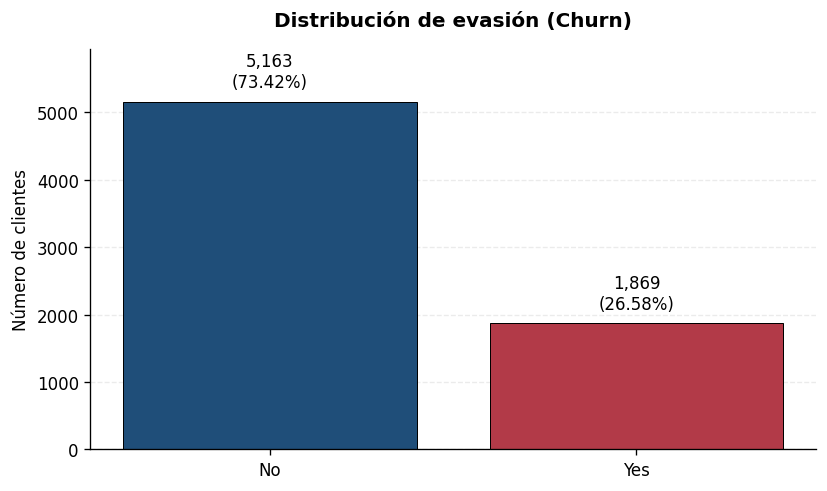

In [ ]:
import matplotlib.pyplot as plt

conteo = df_final["Churn"].value_counts().reindex(["No", "Yes"])
porcentaje = (conteo / conteo.sum() * 100).round(2)

colors = ["#1F4E79", "#B23A48"]

fig, ax = plt.subplots(figsize=(7, 4.2), dpi=120)
bars = ax.bar(conteo.index, conteo.values, color=colors, edgecolor="black", linewidth=0.6)

ax.set_title("Distribución de evasión (Churn)", pad=14, fontweight="bold")
ax.set_ylabel("Número de clientes")
ax.grid(axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Dejar aire arriba
ax.set_ylim(0, conteo.max() * 1.15)

for i, b in enumerate(bars):
    h = b.get_height()
    ax.text(
        b.get_x() + b.get_width()/2,
        h + conteo.max()*0.03,
        f"{int(h):,}\n({porcentaje.iloc[i]}%)",
        ha="center", va="bottom", fontsize=10
    )

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


***La gráfica muestra que la mayoría de los clientes no presenta evasión: 5,163 clientes (73.42%) permanecen activos, mientras que 1,869 clientes (26.58%) se dieron de baja. Esto indica que, aunque la base principal se mantiene, existe una proporción relevante de cancelaciones (aprox. 1 de cada 4 clientes), por lo que es importante analizar qué características (tipo de contrato, servicios, método de pago, costos, antigüedad, etc.) están asociadas con una mayor probabilidad de churn.***

### Recuento de evasión por variables categoricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras. Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Churn,No,Yes
gender,,
Female,"2,544",939
Male,"2,619",930


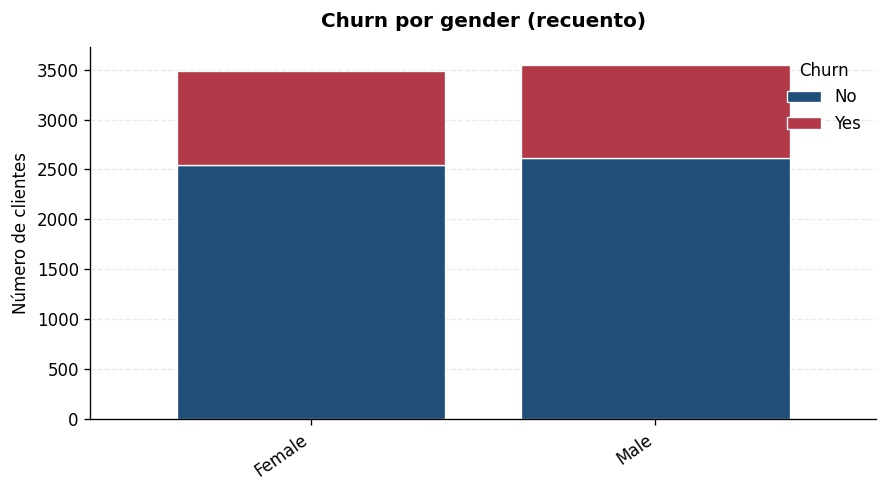

Churn,No,Yes
gender,,
Female,73.04%,26.96%
Male,73.80%,26.20%


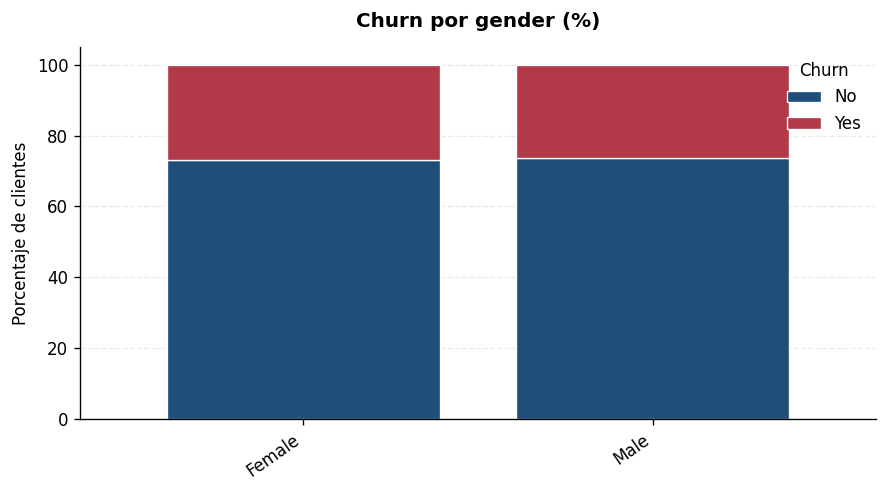

Churn,No,Yes
Contract,,
Month-to-month,"2,220","1,655"
One year,"1,306",166
Two year,"1,637",48


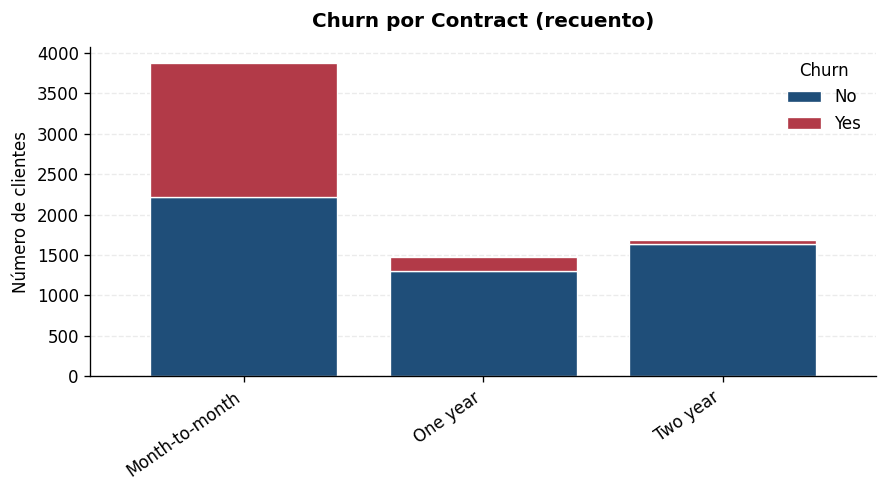

Churn,No,Yes
Contract,,
Month-to-month,57.29%,42.71%
One year,88.72%,11.28%
Two year,97.15%,2.85%


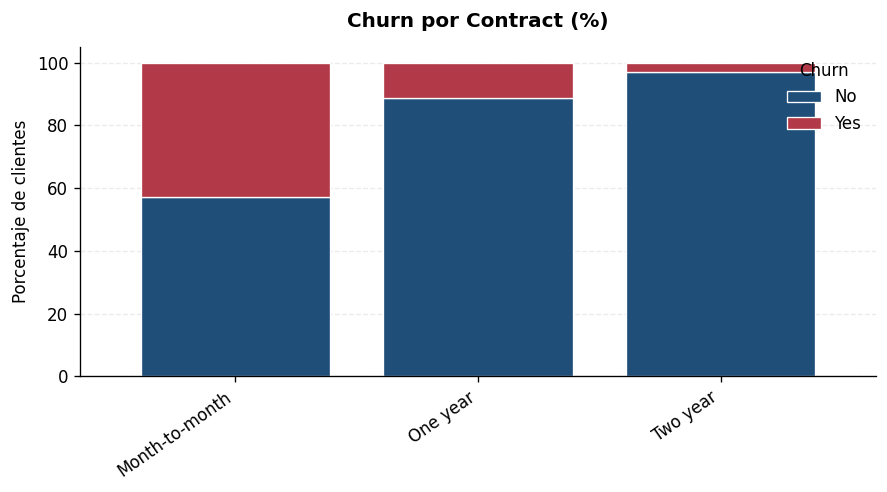

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),"1,284",258
Credit card (automatic),"1,289",232
Electronic check,"1,294","1,071"
Mailed check,"1,296",308


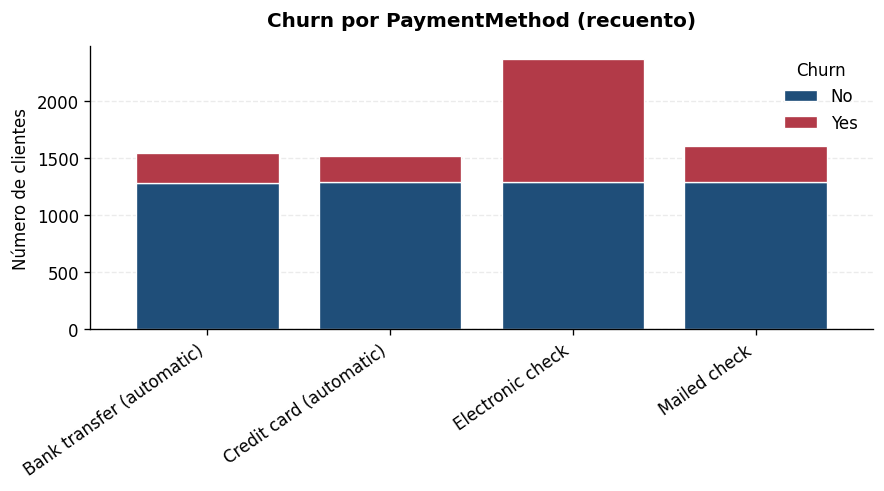

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.27%,16.73%
Credit card (automatic),84.75%,15.25%
Electronic check,54.71%,45.29%
Mailed check,80.80%,19.20%


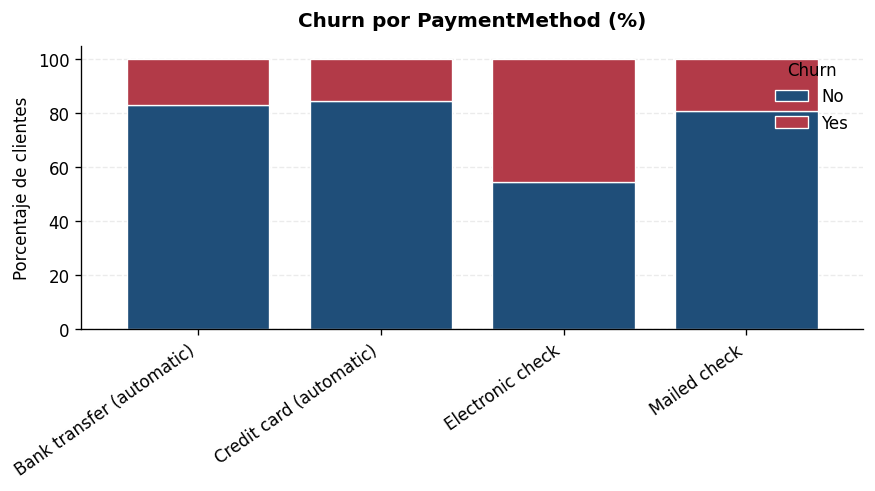

Churn,No,Yes
InternetService,,
DSL,"1,957",459
Fiber optic,"1,799","1,297"
No,"1,407",113


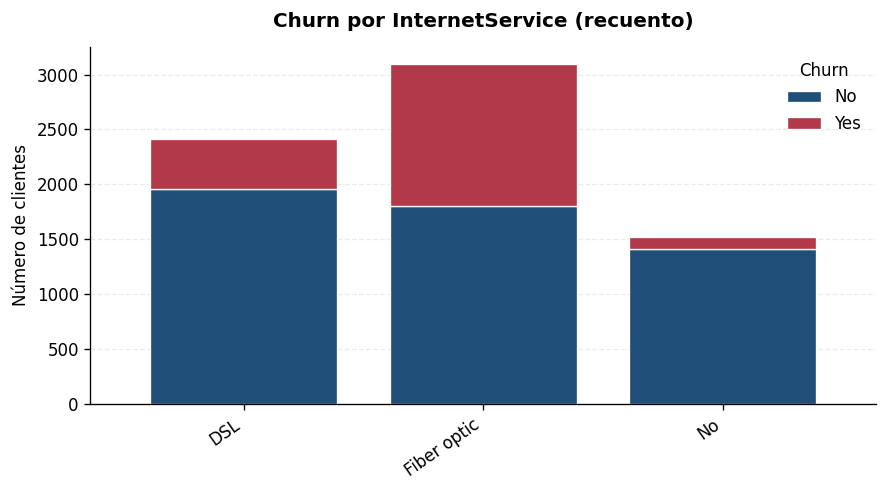

Churn,No,Yes
InternetService,,
DSL,81.00%,19.00%
Fiber optic,58.11%,41.89%
No,92.57%,7.43%


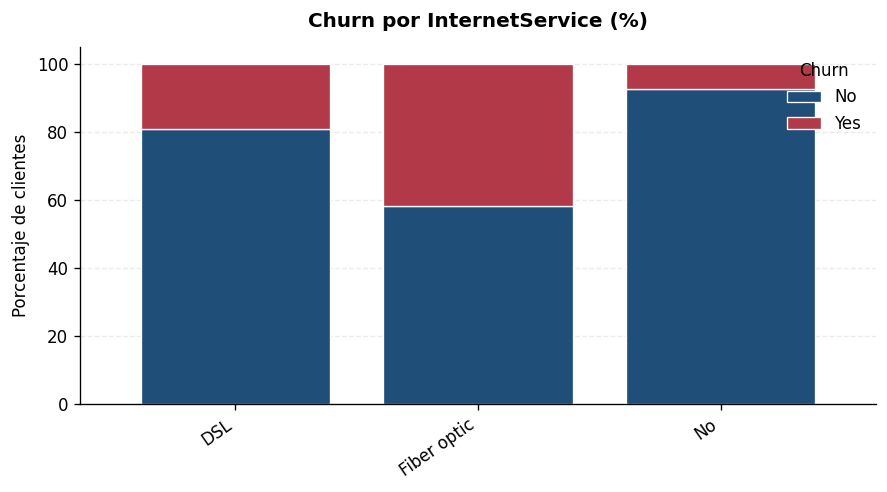

Churn,No,Yes
PaperlessBilling,,
No,"2,395",469
Yes,"2,768","1,400"


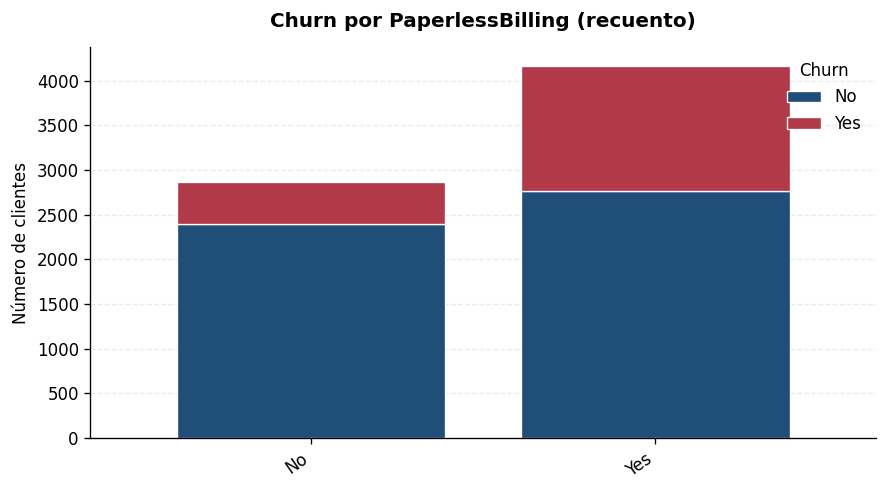

Churn,No,Yes
PaperlessBilling,,
No,83.62%,16.38%
Yes,66.41%,33.59%


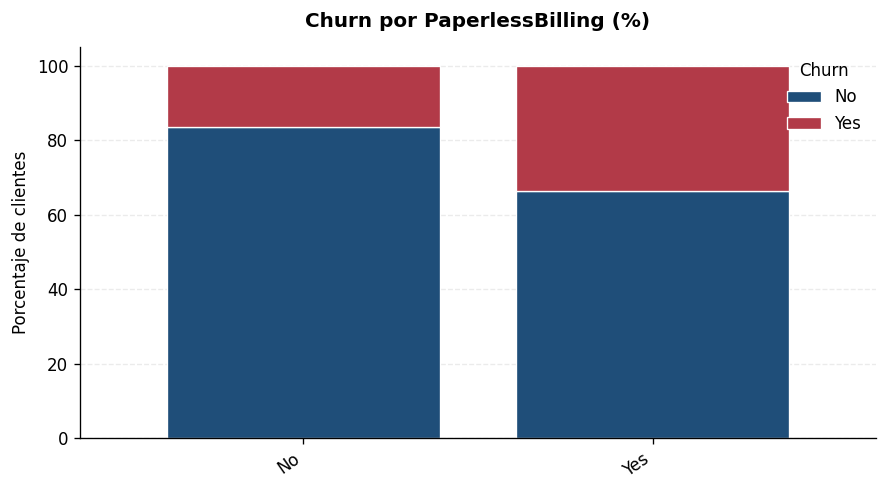

Churn,No,Yes
Partner,,
No,"2,439","1,200"
Yes,"2,724",669


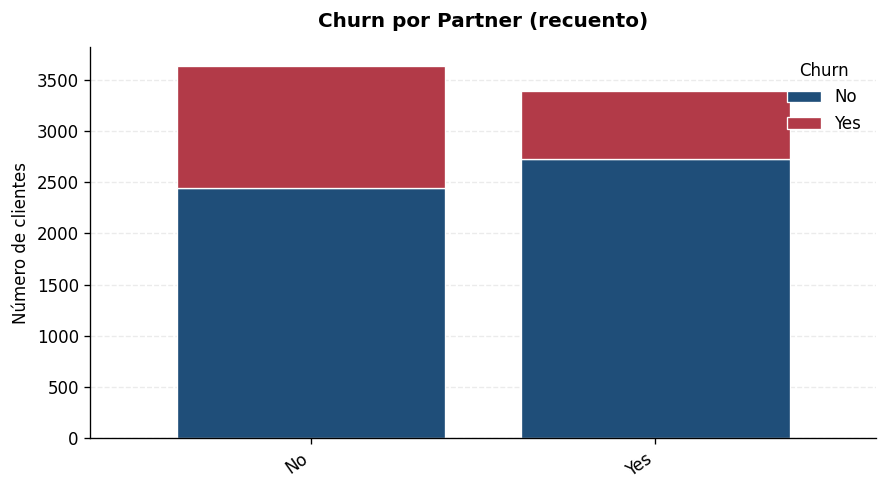

Churn,No,Yes
Partner,,
No,67.02%,32.98%
Yes,80.28%,19.72%


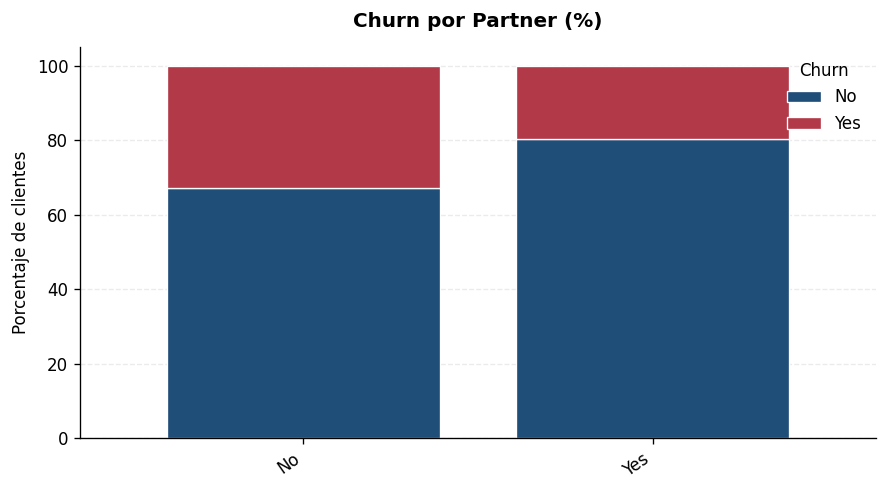

Churn,No,Yes
Dependents,,
No,"3,390","1,543"
Yes,"1,773",326


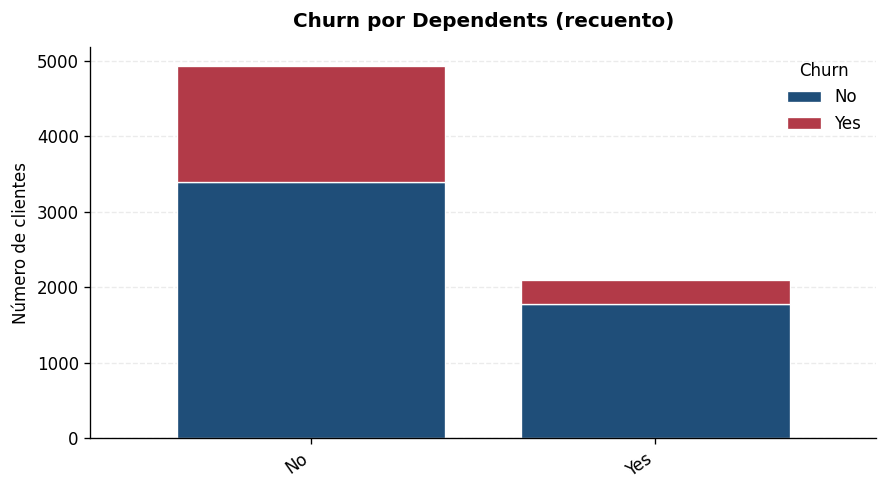

Churn,No,Yes
Dependents,,
No,68.72%,31.28%
Yes,84.47%,15.53%


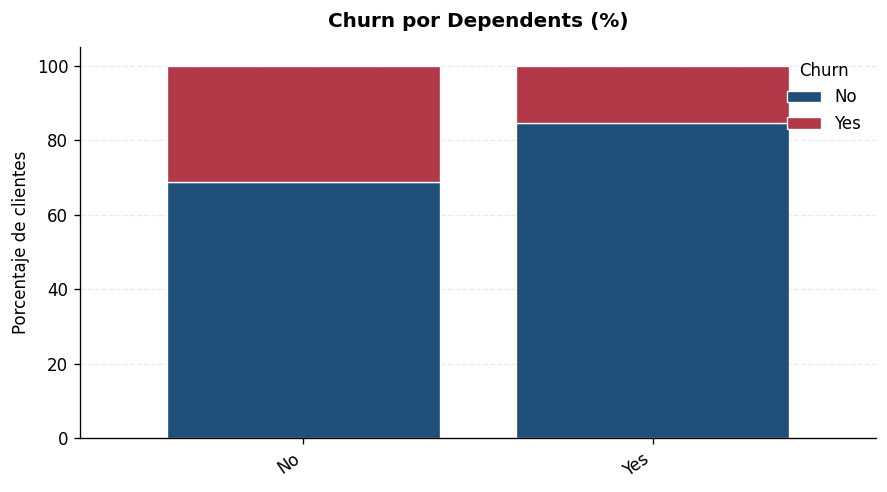

Churn,No,Yes
PhoneService,,
No,510,170
Yes,"4,653","1,699"


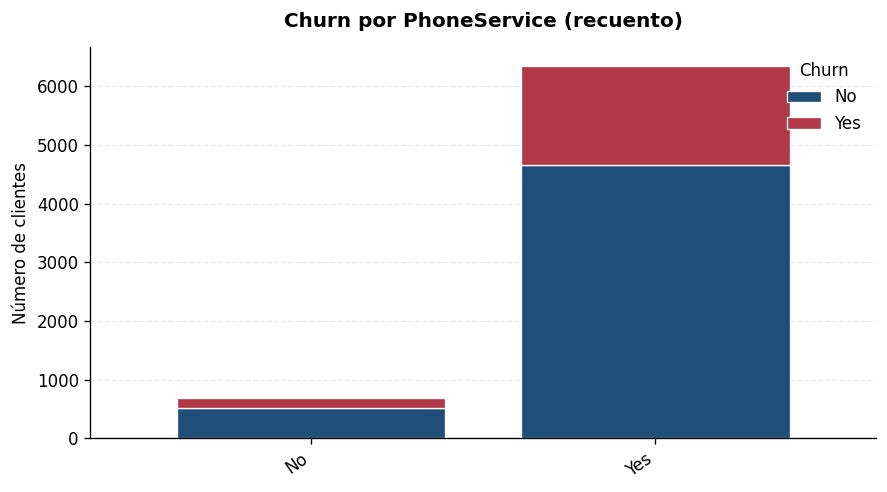

Churn,No,Yes
PhoneService,,
No,75.00%,25.00%
Yes,73.25%,26.75%


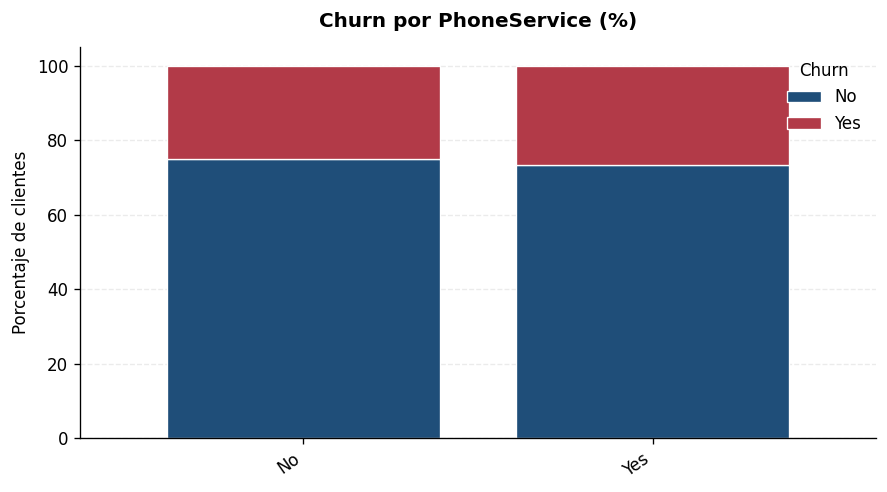

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Paleta "corporativa"
COLOR_NO  = "#1F4E79"   # azul
COLOR_YES = "#B23A48"   # rojo sobrio

vars_cat = ["gender", "Contract", "PaymentMethod", "InternetService",
            "PaperlessBilling", "Partner", "Dependents", "PhoneService"]

def style_counts_table(ct: pd.DataFrame, title: str):
    # Asegurar orden de columnas si existen
    cols = [c for c in ["No", "Yes"] if c in ct.columns]
    ct = ct[cols].copy()

    return (ct.style
            .set_caption(title)
            .format("{:,}")
            .background_gradient(axis=0, cmap="Blues")   # gradiente por columna
            .set_table_styles([
                {"selector":"caption", "props":[("font-size","14px"), ("font-weight","bold"), ("text-align","left")]},
                {"selector":"th", "props":[("background-color","#F2F2F2"), ("font-weight","bold"), ("text-align","center")]},
                {"selector":"td", "props":[("text-align","center")]}
            ])
           )

def style_pct_table(ct_pct: pd.DataFrame, title: str):
    cols = [c for c in ["No", "Yes"] if c in ct_pct.columns]
    ct_pct = ct_pct[cols].copy()

    return (ct_pct.style
            .set_caption(title)
            .format("{:.2f}%")
            .background_gradient(axis=None, cmap="RdBu_r")  # resalta contrastes
            .set_table_styles([
                {"selector":"caption", "props":[("font-size","14px"), ("font-weight","bold"), ("text-align","left")]},
                {"selector":"th", "props":[("background-color","#F2F2F2"), ("font-weight","bold"), ("text-align","center")]},
                {"selector":"td", "props":[("text-align","center")]}
            ])
           )

def plot_stacked(ct: pd.DataFrame, title: str, ylabel: str):
    cols = [c for c in ["No", "Yes"] if c in ct.columns]
    ct = ct[cols].copy()

    fig, ax = plt.subplots(figsize=(7.5, 4.2), dpi=120)
    ct.plot(kind="bar", stacked=True, ax=ax, color=[COLOR_NO, COLOR_YES], width=0.78,
            edgecolor="white", linewidth=0.8)

    ax.set_title(title, fontweight="bold", pad=12)
    ax.set_xlabel("")
    ax.set_ylabel(ylabel)

    ax.grid(axis="y", linestyle="--", alpha=0.25)
    ax.set_axisbelow(True)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.legend(title="Churn", frameon=False, loc="upper right")
    plt.xticks(rotation=35, ha="right")
    plt.tight_layout()
    plt.show()

# --- Loop por variable categórica ---
for col in vars_cat:
    # Tabla de recuento
    ct = pd.crosstab(df_final[col], df_final["Churn"])
    display(style_counts_table(ct, f"Recuento de Churn por {col}"))

    # Gráfica de recuento
    plot_stacked(ct, f"Churn por {col} (recuento)", "Número de clientes")

    # Tabla de porcentaje por categoría
    ct_pct = pd.crosstab(df_final[col], df_final["Churn"], normalize="index") * 100
    display(style_pct_table(ct_pct, f"Churn (%) por {col}"))

    # Gráfica de porcentaje
    plot_stacked(ct_pct, f"Churn por {col} (%)", "Porcentaje de clientes")


### Conteo de evasión por variables numericas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron. Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

1) Resumen estadístico por Churn (No vs Yes)

In [ ]:
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

df_final.groupby("Churn")[num_cols].describe()


tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      Charges.Monthly             ... Charges.Total          Cuentas_Diarias  \
                count       mean  ...           75%      max           count   
Churn                             ...                                          
No             5163.0  61.307408  ...      4264.125  8672.45          5163.0   
Yes            1869.0  74.441332  ...      2331.300  8684.80          1869.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
Churn                                                                        
No     2.043580  1.036485  0.608333  0.836667  2.148333  2.949167  3.958333  
Yes    2.481378  0.822202  0.628333  1.871667  2.655000  3.140000  3.945000  

[2 rows x 32 columns]

2) Histogramas comparativos (No vs Yes) por variable numérica

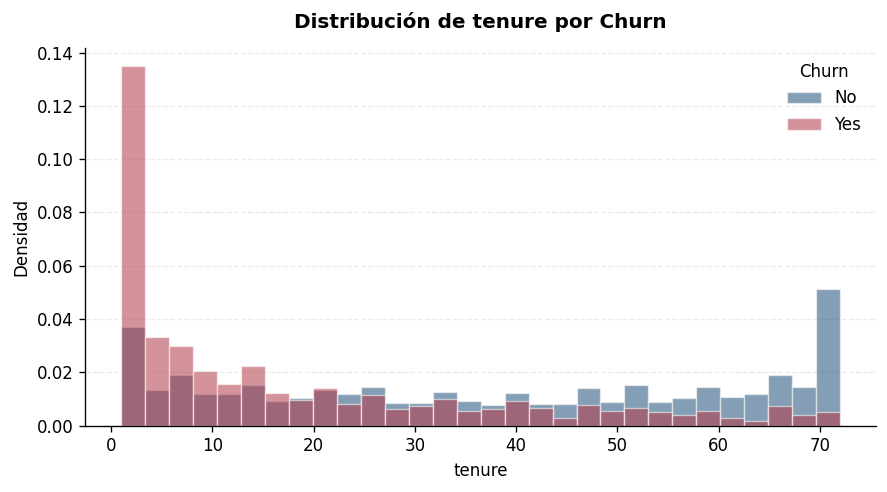

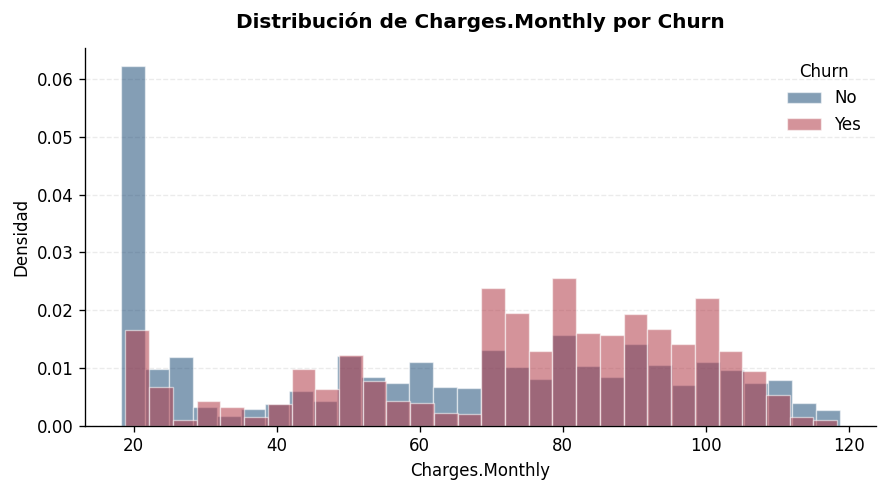

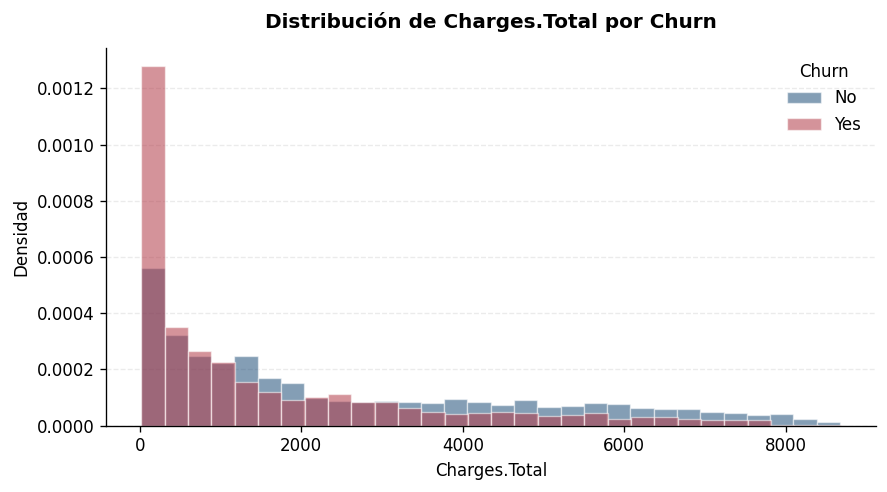

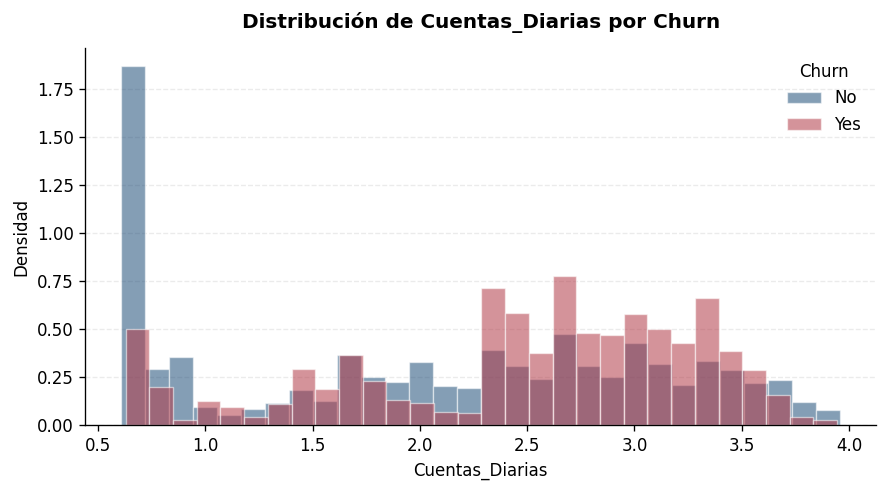

In [ ]:
COLOR_NO  = "#1F4E79"   # azul corporativo
COLOR_YES = "#B23A48"   # rojo sobrio

num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

for col in num_cols:
    x_no  = df_final.loc[df_final["Churn"] == "No", col].dropna()
    x_yes = df_final.loc[df_final["Churn"] == "Yes", col].dropna()

    fig, ax = plt.subplots(figsize=(7.5, 4.2), dpi=120)

    ax.hist(x_no,  bins=30, density=True, alpha=0.55, label="No",
            color=COLOR_NO, edgecolor="white", linewidth=0.8)
    ax.hist(x_yes, bins=30, density=True, alpha=0.55, label="Yes",
            color=COLOR_YES, edgecolor="white", linewidth=0.8)

    ax.set_title(f"Distribución de {col} por Churn", fontweight="bold", pad=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Densidad")  # ya no "Frecuencia" porque usamos density=True

    ax.grid(axis="y", linestyle="--", alpha=0.25)
    ax.set_axisbelow(True)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.legend(title="Churn", frameon=False)
    plt.tight_layout()
    plt.show()



3) Boxplot (comparación directa de medianas y dispersión)

/tmp/ipython-input-3671903672.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"], showmeans=True)


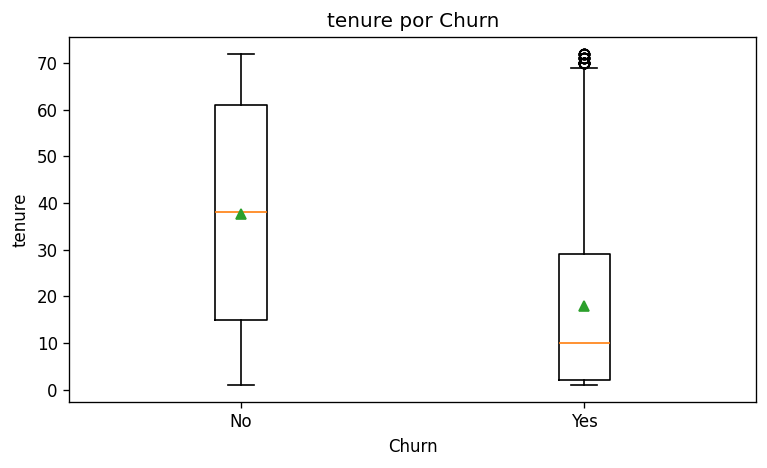

/tmp/ipython-input-3671903672.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"], showmeans=True)


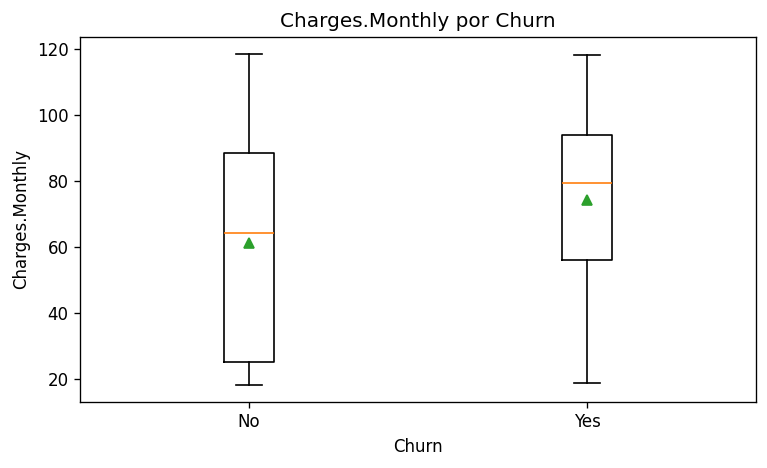

/tmp/ipython-input-3671903672.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"], showmeans=True)


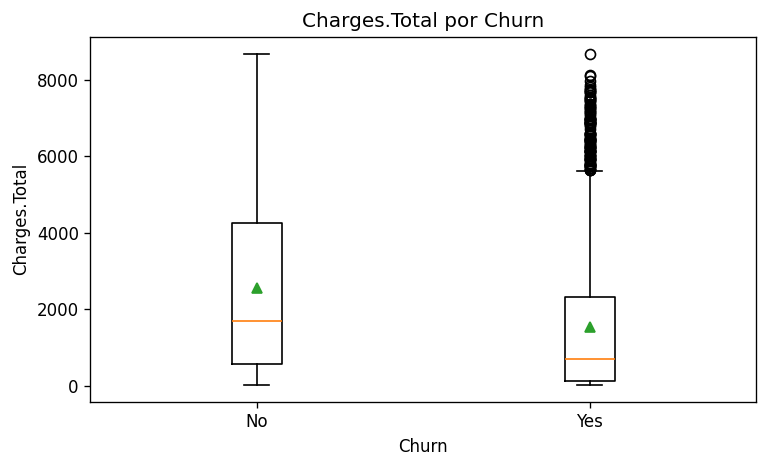

/tmp/ipython-input-3671903672.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"], showmeans=True)


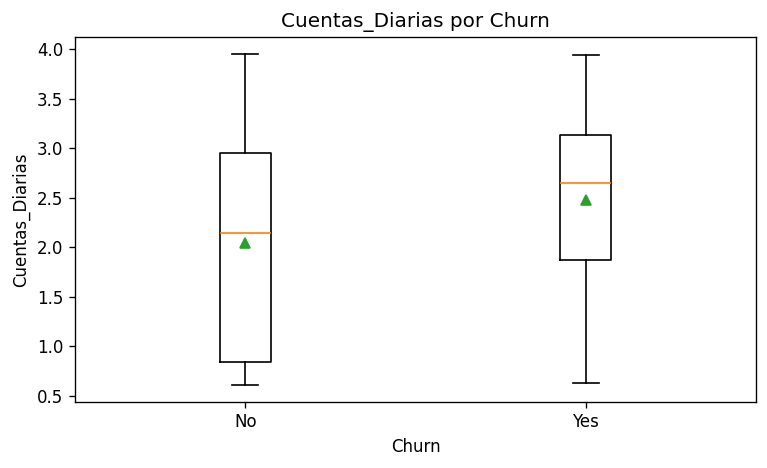

In [ ]:
num_cols = ["tenure", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

for col in num_cols:
    data = [
        df_final.loc[df_final["Churn"] == "No", col].dropna(),
        df_final.loc[df_final["Churn"] == "Yes", col].dropna()
    ]

    plt.figure(figsize=(6.5, 4), dpi=120)
    plt.boxplot(data, labels=["No", "Yes"], showmeans=True)
    plt.title(f"{col} por Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


##📄Informe final